## MSIS2534 Fall 2024 group project: Jaden Deng,  Amy Zhou

In [138]:
!pip install wordcloud
!pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK data (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Import Libraries and Load Dataset

In [139]:
# Load the dataset
data = pd.read_csv('google_reviews.csv')

# Display first few rows
data.head()

,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu


### Data Cleaning

In [140]:
# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize words
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply cleaning function to the 'text' column
data['cleaned_text'] = data['text'].apply(lambda x: clean_text(x) if isinstance(x, str) else '')

# Display cleaned data
data[['text', 'cleaned_text']].head()

,text,cleaned_text
0,We went to Marmaris with my wife for a holiday...,went marmaris wife holiday chose restaurant pl...
1,During my holiday in Marmaris we ate here to f...,holiday marmaris ate fit food really good food...
2,Prices are very affordable. The menu in the ph...,price affordable menu photo cost lira wait min...
3,Turkey's cheapest artisan restaurant and its f...,turkey cheapest artisan restaurant food delicious
4,I don't know what you will look for in terms o...,dont know look term price performance point ta...


### Data Exploration

## Distribution of Ratings

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_5624\3652456274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data, palette='viridis')


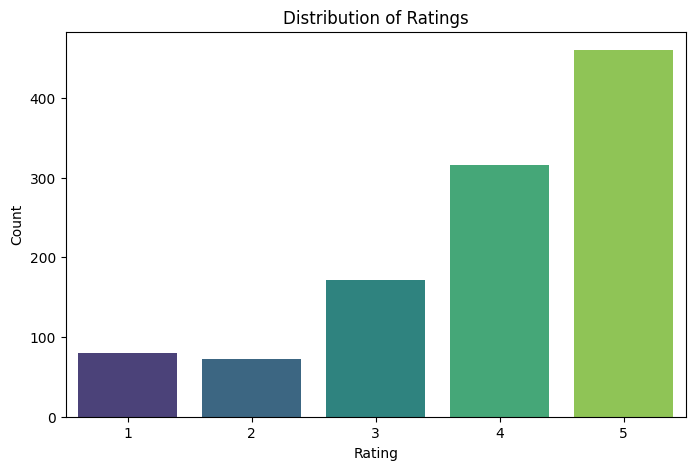

In [14]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=data, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Number of Reviews per Restaurant

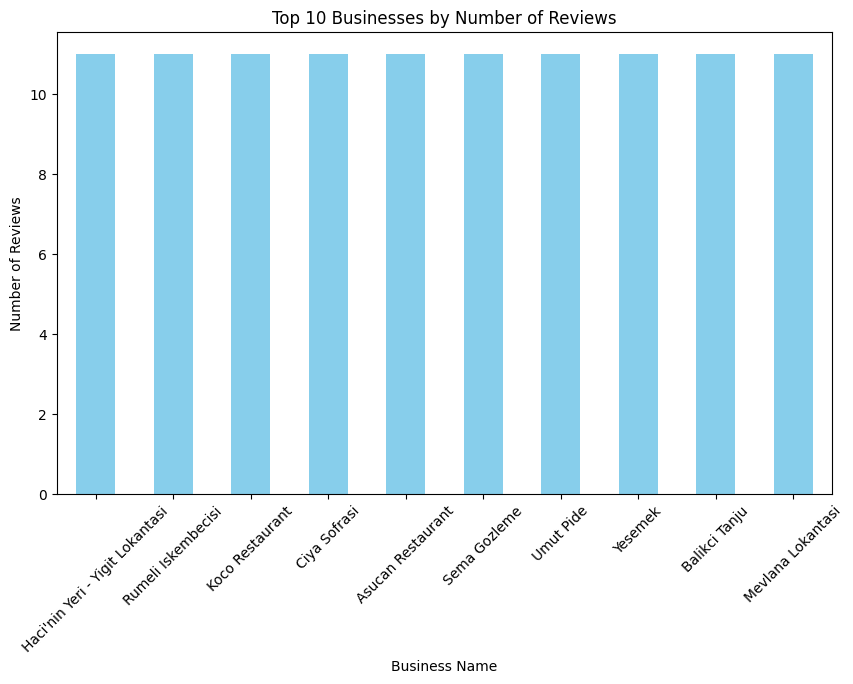

In [15]:
# Count the number of reviews for each business
business_reviews = data['business_name'].value_counts()

# Plot top 10 businesses by number of reviews
plt.figure(figsize=(10, 6))
business_reviews[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Businesses by Number of Reviews')
plt.xlabel('Business Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


## Common Words in the Text

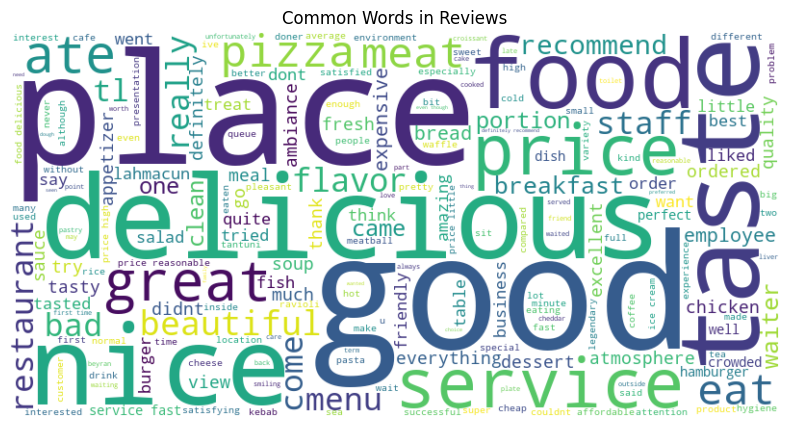

In [16]:
# Combine all cleaned text
all_words = ' '.join(data['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Reviews')
plt.show()

### Summary Statistics

In [17]:
# Summary of ratings
rating_summary = data['rating'].describe()
print("Rating Summary:")
print(rating_summary)

# Number of unique businesses
unique_businesses = data['business_name'].nunique()
print(f"Number of unique businesses: {unique_businesses}")

# Total number of reviews
total_reviews = len(data)
print(f"Total number of reviews: {total_reviews}")

Rating Summary:
count    1100.000000
mean        3.912727
std         1.218459
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
Number of unique businesses: 100
Total number of reviews: 1100


### Sentiment analysis

## Import Required Libraries

In [18]:
!pip install textblob
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk

# Download VADER for sentiment analysis
nltk.download('vader_lexicon')

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------------------------------------- 626.3/626.3 kB 11.7 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...


True

## Sentiment Analysis with VADER

In [19]:
# Initialize the VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def vader_sentiment_analysis(text):
    if not isinstance(text, str):
        return 'Neutral'
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score > 0.05:
        return 'Positive'
    elif sentiment_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment analysis to the cleaned text
data['vader_sentiment'] = data['cleaned_text'].apply(vader_sentiment_analysis)

# Display results
data[['cleaned_text', 'vader_sentiment']].head()

,cleaned_text,vader_sentiment
0,went marmaris wife holiday chose restaurant pl...,Negative
1,holiday marmaris ate fit food really good food...,Positive
2,price affordable menu photo cost lira wait min...,Positive
3,turkey cheapest artisan restaurant food delicious,Positive
4,dont know look term price performance point ta...,Neutral


## Visualize Sentiment Distribution

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_5624\4216430410.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


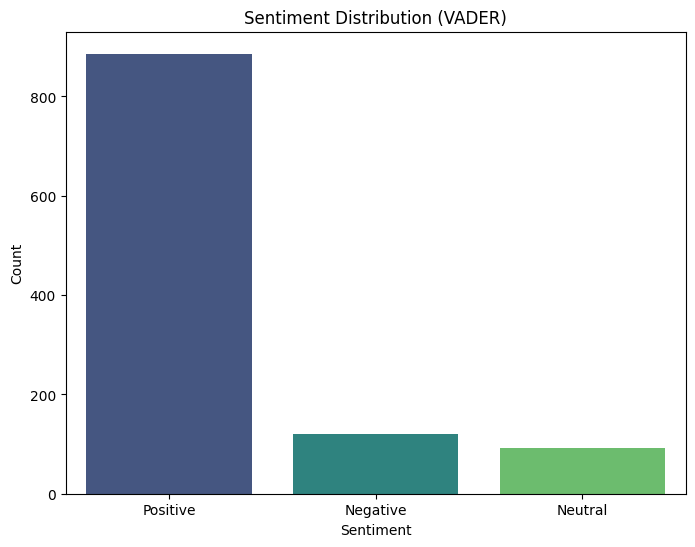

In [20]:
# Count the number of each sentiment
sentiment_counts = data['vader_sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution (VADER)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Sentiment Analysis by Restaurant

<Figure size 1200x800 with 0 Axes>

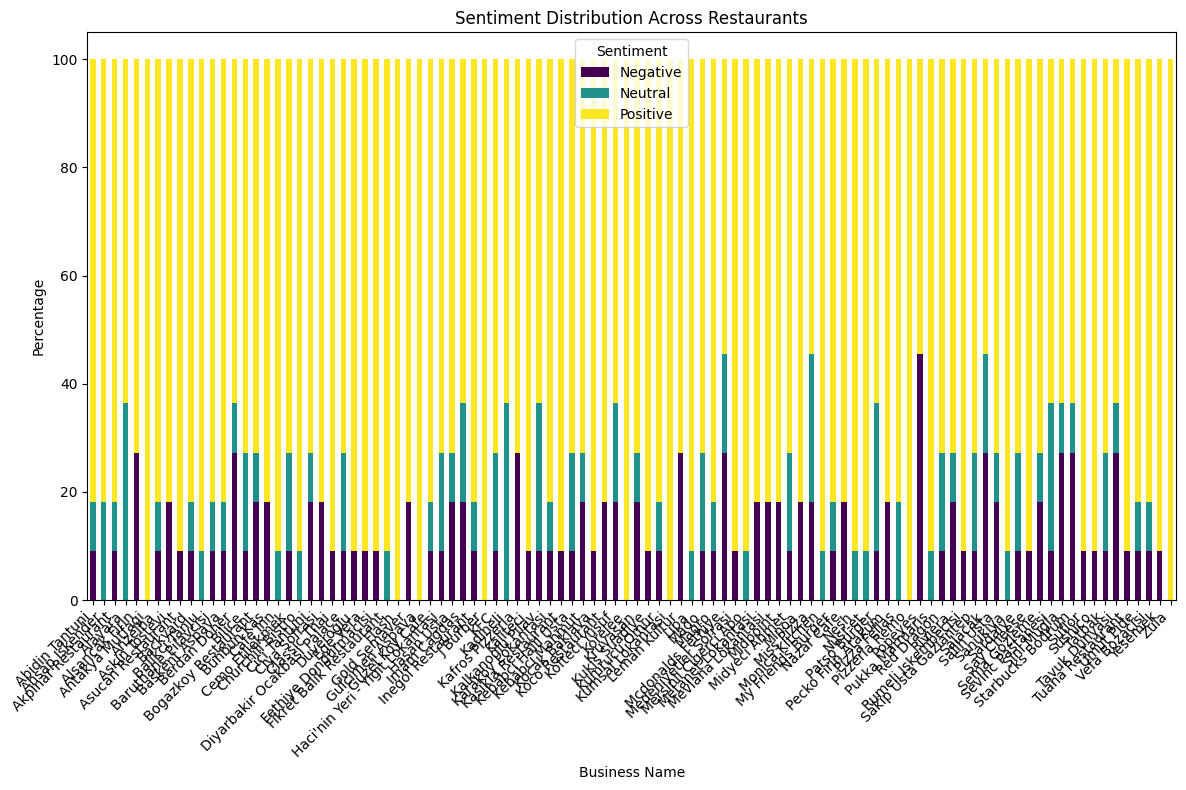

In [21]:
# Group sentiment by business name
business_sentiment = data.groupby(['business_name', 'vader_sentiment']).size().unstack(fill_value=0)

# Normalize sentiment counts to percentages
business_sentiment_percentage = business_sentiment.div(business_sentiment.sum(axis=1), axis=0) * 100

# Display the sentiment distribution across restaurants
plt.figure(figsize=(12, 8))
business_sentiment_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Sentiment Distribution Across Restaurants')
plt.xlabel('Business Name')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

### Topic Modeling

## Import libraries

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

# Ensure nltk resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WINDOWS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Vectorize Text Data

In [23]:
# Use CountVectorizer for LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_matrix = count_vectorizer.fit_transform(data['cleaned_text'])

# Use TfidfVectorizer for NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

## Apply Topic Modeling

# LDA (Latent Dirichlet Allocation)

In [24]:
# LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(count_matrix)

# Display LDA topics
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[-no_top_words:]]))
        print("\n")

display_topics(lda_model, count_vectorizer.get_feature_names_out(), 10)

Topic 1:
employee, service, staff, nice, delicious, food, place, taste, price, good


Topic 2:
great, fish, bit, best, ambiance, nice, expensive, delicious, pizza, place


Topic 3:
food, meat, view, drink, nice, burger, waiter, delicious, good, place


Topic 4:
food, taste, recommend, bad, delicious, price, portion, great, service, good


Topic 5:
breakfast, table, nice, order, cream, ice, service, really, came, taste




# NMF (Non-Negative Matrix Factorization)

In [25]:
# NMF model
nmf_model = NMF(n_components=5, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# Display NMF topics
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10)

Topic 1:
quality, waiter, bad, ate, service, lahmacun, employee, meat, taste, good


Topic 2:
reasonable, service, really, friendly, fast, fresh, staff, employee, food, delicious


Topic 3:
food, recommend, taste, dish, appetizer, thanks, thank, ambiance, service, great


Topic 4:
fish, crowded, beautiful, pizza, clean, food, ambiance, expensive, nice, place


Topic 5:
portion, menu, tl, little, like, service, reasonable, recommend, high, price




## Analyze Topics

# Assign Topics to Reviews

In [26]:
# Assign the dominant topic to each review for LDA
data['lda_topic'] = lda_topics.argmax(axis=1)

# Assign the dominant topic to each review for NMF
data['nmf_topic'] = nmf_topics.argmax(axis=1)

# Display the first few rows with assigned topics
data[['text', 'cleaned_text', 'lda_topic', 'nmf_topic']].head()

,text,cleaned_text,lda_topic,nmf_topic
0,We went to Marmaris with my wife for a holiday...,went marmaris wife holiday chose restaurant pl...,0,3
1,During my holiday in Marmaris we ate here to f...,holiday marmaris ate fit food really good food...,0,4
2,Prices are very affordable. The menu in the ph...,price affordable menu photo cost lira wait min...,0,1
3,Turkey's cheapest artisan restaurant and its f...,turkey cheapest artisan restaurant food delicious,0,1
4,I don't know what you will look for in terms o...,dont know look term price performance point ta...,0,4


# Correlate Topics with Ratings

In [27]:
# Group reviews by topic and calculate average rating for LDA
lda_topic_ratings = data.groupby('lda_topic')['rating'].mean()

# Group reviews by topic and calculate average rating for NMF
nmf_topic_ratings = data.groupby('nmf_topic')['rating'].mean()

print("LDA Topic Ratings:")
print(lda_topic_ratings)

print("\nNMF Topic Ratings:")
print(nmf_topic_ratings)

LDA Topic Ratings:
lda_topic
0    4.018750
1    4.055794
2    3.869792
3    3.797235
4    3.666667
Name: rating, dtype: float64

NMF Topic Ratings:
nmf_topic
0    3.851163
1    4.153846
2    4.641026
3    3.880503
4    3.661238
Name: rating, dtype: float64


## Visualize Results

# Word Clouds for Topics

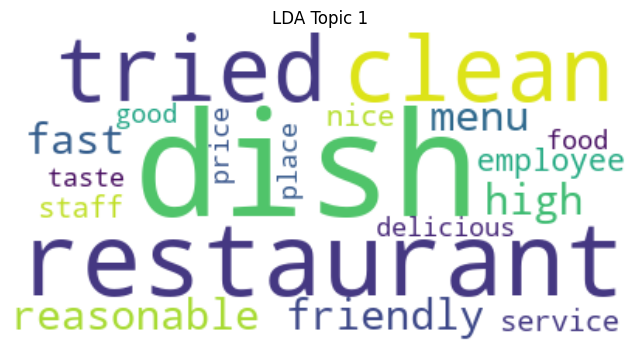

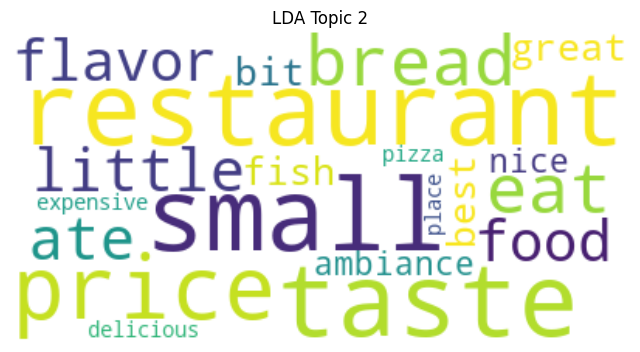

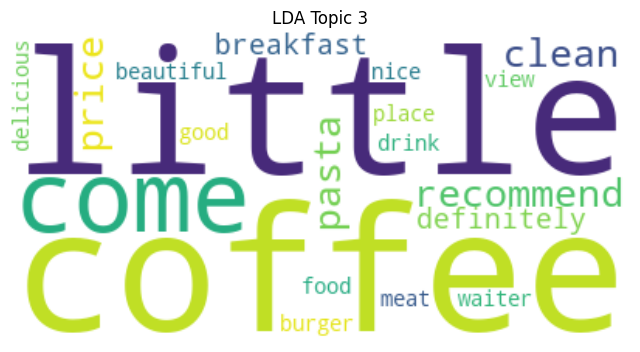

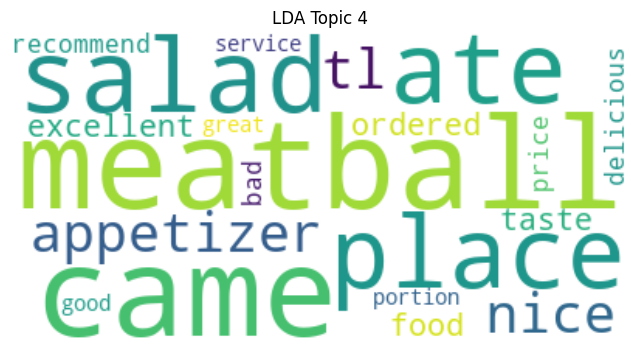

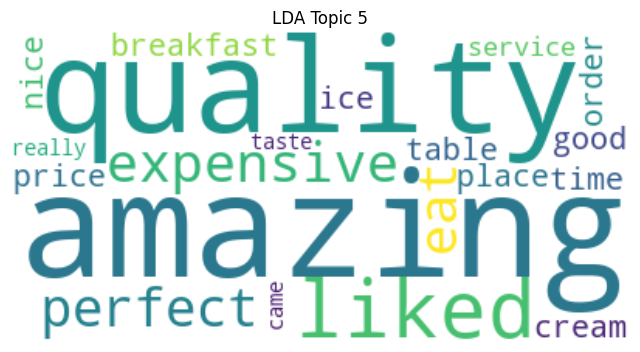

In [28]:
# Word cloud for each LDA topic
for idx, topic in enumerate(lda_model.components_):
    wordcloud = WordCloud(background_color='white').generate(
        " ".join([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
    )
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"LDA Topic {idx + 1}")
    plt.show()

# Topic Distribution

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_5624\2126602536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lda_topic_counts.index, y=lda_topic_counts.values, palette='viridis')


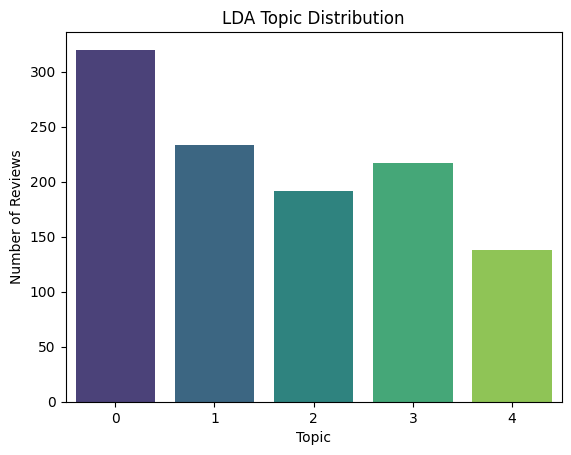

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_5624\2126602536.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nmf_topic_counts.index, y=nmf_topic_counts.values, palette='viridis')


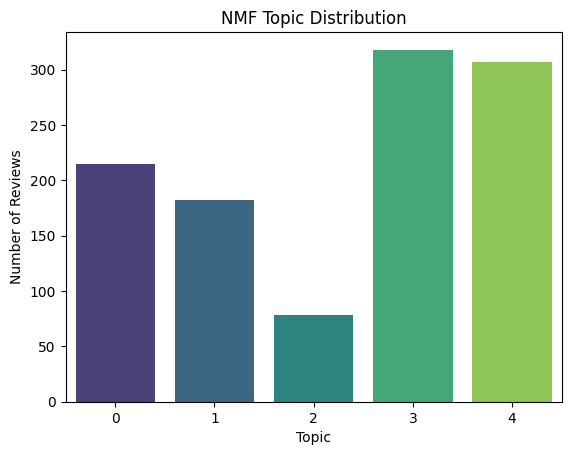

In [29]:
# Plot LDA topic distribution
lda_topic_counts = data['lda_topic'].value_counts()
sns.barplot(x=lda_topic_counts.index, y=lda_topic_counts.values, palette='viridis')
plt.title('LDA Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.show()

# Plot NMF topic distribution
nmf_topic_counts = data['nmf_topic'].value_counts()
sns.barplot(x=nmf_topic_counts.index, y=nmf_topic_counts.values, palette='viridis')
plt.title('NMF Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.show()

### Keyword and Phrase Extraction

## Import Required Libraries

In [30]:
!pip install spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

# Load SpaCy model for NER
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached smart_open-7.0.5-py3-none-any.whl.metadata (24 kB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------- ----------------------- 5.0/12.3 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 12.3/12.3 MB 36.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 40.0 MB/s eta 0:00:00
   ------------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.2.16 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
langchain-community 0.2.17 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------  12.6/12.8 MB 71.6 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 53.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Extract Keywords Using TF-IDF

In [31]:
# Split data into positive and negative reviews
positive_reviews = data[data['rating'] >= 4]['cleaned_text']
negative_reviews = data[data['rating'] <= 2]['cleaned_text']

# Apply TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50)
positive_tfidf = vectorizer.fit_transform(positive_reviews)
negative_tfidf = vectorizer.fit_transform(negative_reviews)

# Get keywords
positive_keywords = vectorizer.get_feature_names_out()
negative_keywords = vectorizer.get_feature_names_out()

print("Top Keywords in Positive Reviews:")
print(positive_keywords)

print("\nTop Keywords in Negative Reviews:")
print(negative_keywords)

Top Keywords in Positive Reviews:
['also' 'ate' 'bad' 'beautiful' 'bread' 'breakfast' 'business' 'came'
 'care' 'cold' 'couldnt' 'cream' 'customer' 'definitely' 'didnt' 'dont'
 'eat' 'even' 'expensive' 'first' 'food' 'good' 'ice' 'ice cream' 'like'
 'little' 'meat' 'menu' 'minute' 'nice' 'order' 'ordered' 'pizza' 'place'
 'portion' 'price' 'recommend' 'restaurant' 'said' 'sauce' 'say' 'seen'
 'service' 'staff' 'table' 'taste' 'tea' 'tl' 'wait' 'waiter']

Top Keywords in Negative Reviews:
['also' 'ate' 'bad' 'beautiful' 'bread' 'breakfast' 'business' 'came'
 'care' 'cold' 'couldnt' 'cream' 'customer' 'definitely' 'didnt' 'dont'
 'eat' 'even' 'expensive' 'first' 'food' 'good' 'ice' 'ice cream' 'like'
 'little' 'meat' 'menu' 'minute' 'nice' 'order' 'ordered' 'pizza' 'place'
 'portion' 'price' 'recommend' 'restaurant' 'said' 'sauce' 'say' 'seen'
 'service' 'staff' 'table' 'taste' 'tea' 'tl' 'wait' 'waiter']


## Extract Phrases Using NER

In [32]:
# Function to extract named entities
def extract_named_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ['ORG', 'GPE', 'FOOD', 'FAC']]
    return entities

# Apply NER to reviews
data['named_entities'] = data['text'].apply(lambda x: extract_named_entities(x) if isinstance(x, str) else [])

## Analyze Keyword and Phrase Frequency

# Keyword Frequency in Positive and Negative Reviews

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_5624\4245807403.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=positive_keywords_df, palette='viridis')


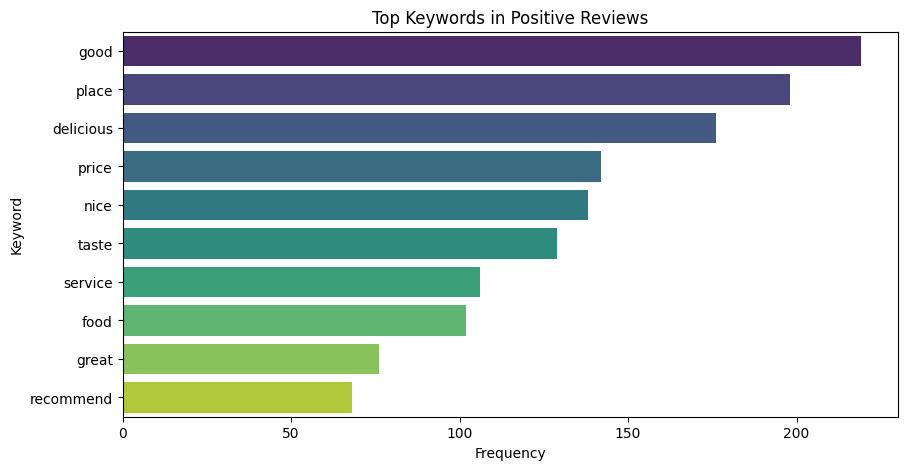

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_5624\4245807403.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=negative_keywords_df, palette='coolwarm')


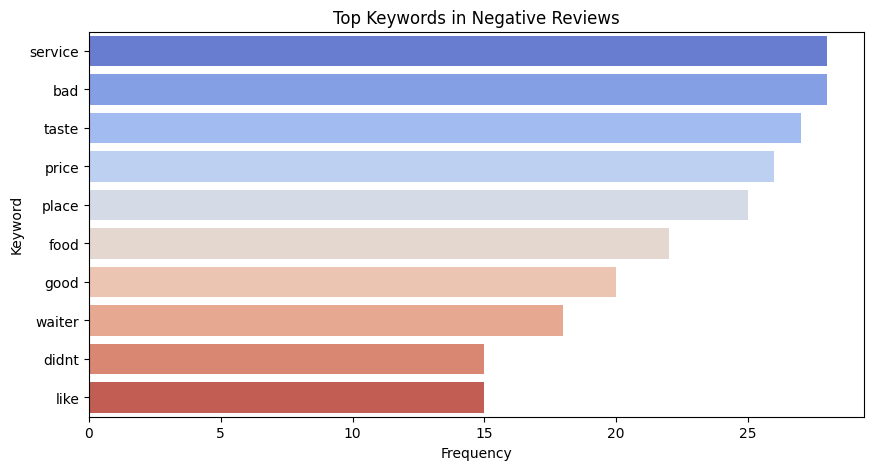

In [33]:
from collections import Counter

# Count keyword frequency
positive_counter = Counter(" ".join(positive_reviews).split())
negative_counter = Counter(" ".join(negative_reviews).split())

# Convert to DataFrame for visualization
positive_keywords_df = pd.DataFrame(positive_counter.most_common(10), columns=['Keyword', 'Frequency'])
negative_keywords_df = pd.DataFrame(negative_counter.most_common(10), columns=['Keyword', 'Frequency'])

# Plot keyword frequencies
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Keyword', data=positive_keywords_df, palette='viridis')
plt.title('Top Keywords in Positive Reviews')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Keyword', data=negative_keywords_df, palette='coolwarm')
plt.title('Top Keywords in Negative Reviews')
plt.show()

# Named Entity Frequency

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_5624\1115229120.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Entity', data=entity_df, palette='Blues')


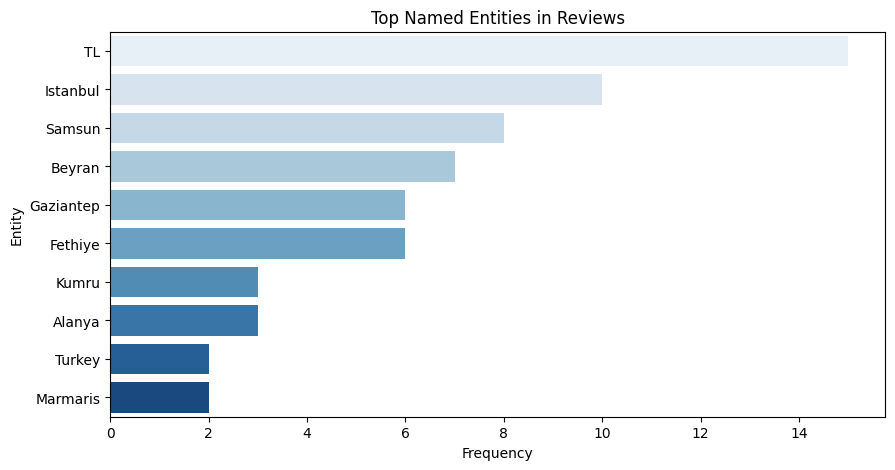

In [34]:
# Flatten named entities
all_entities = [entity for entities in data['named_entities'] for entity in entities]

# Count entity frequency
entity_counter = Counter(all_entities)
entity_df = pd.DataFrame(entity_counter.most_common(10), columns=['Entity', 'Frequency'])

# Plot named entity frequencies
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Entity', data=entity_df, palette='Blues')
plt.title('Top Named Entities in Reviews')
plt.show()

### Analysis of Ratings and Sentiment Correlation

## Calculate Sentiment Scores

In [35]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def calculate_sentiment(text):
    if isinstance(text, str):
        sentiment = sia.polarity_scores(text)
        return sentiment['compound']  # Use compound score as the overall sentiment
    else:
        return 0  # Neutral for missing or non-text reviews

# Apply sentiment calculation
data['sentiment_score'] = data['text'].apply(calculate_sentiment)

# Display updated dataset
data[['rating', 'text', 'sentiment_score']].head()

,rating,text,sentiment_score
0,5,We went to Marmaris with my wife for a holiday...,0.3071
1,4,During my holiday in Marmaris we ate here to f...,0.7565
2,3,Prices are very affordable. The menu in the ph...,0.7184
3,5,Turkey's cheapest artisan restaurant and its f...,0.6114
4,3,I don't know what you will look for in terms o...,0.0000


## Correlation Analysis

In [36]:
# Compute the correlation between ratings and sentiment scores
correlation = data['rating'].corr(data['sentiment_score'])
print(f"Correlation between ratings and sentiment scores: {correlation:.2f}")

Correlation between ratings and sentiment scores: 0.58


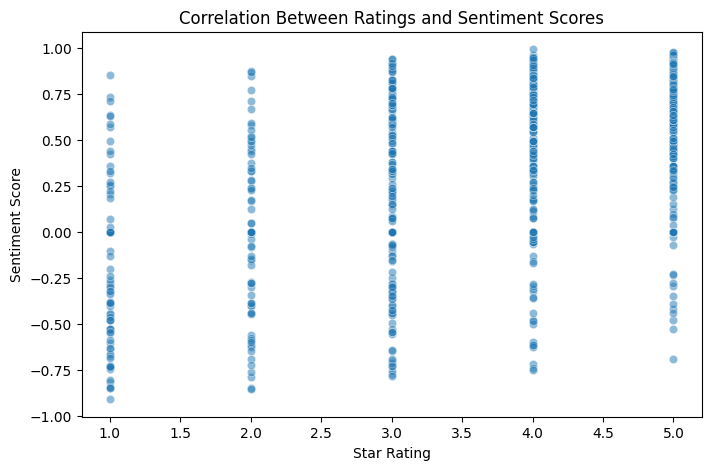

In [37]:
# Scatter plot of sentiment scores vs. ratings
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rating', y='sentiment_score', data=data, alpha=0.5)
plt.title('Correlation Between Ratings and Sentiment Scores')
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Score')
plt.show()

## Identify Discrepancies

In [38]:
# Define thresholds for discrepancies
positive_sentiment_threshold = 0.5
negative_sentiment_threshold = -0.5

# Identify discrepancies
discrepancies = data[
    ((data['rating'] <= 2) & (data['sentiment_score'] > positive_sentiment_threshold)) | 
    ((data['rating'] >= 4) & (data['sentiment_score'] < negative_sentiment_threshold))
]

# Display discrepancies
print("Discrepancies between ratings and sentiment scores:")
print(discrepancies[['rating', 'sentiment_score', 'text']])

Discrepancies between ratings and sentiment scores:
      rating  sentiment_score  \
32         2           0.8735   
39         2           0.5824   
91         2           0.6705   
240        2           0.8481   
268        5          -0.6877   
330        2           0.5228   
334        4          -0.6124   
397        4          -0.7140   
404        4          -0.5994   
487        2           0.5927   
489        1           0.8513   
531        4          -0.6259   
535        2           0.7096   
574        5          -0.5264   
581        2           0.5520   
645        4          -0.7366   
804        1           0.5729   
837        1           0.7339   
845        2           0.8686   
905        1           0.7096   
916        1           0.6369   
981        1           0.5868   
1003       4          -0.7471   
1023       2           0.7713   
1061       1           0.6310   
1066       4          -0.6128   
1089       2           0.5182   

                       

In [39]:
# Count of discrepancies
print(f"Total number of discrepancies: {len(discrepancies)}")

# Percentage of discrepancies
discrepancy_percentage = (len(discrepancies) / len(data)) * 100
print(f"Percentage of reviews with discrepancies: {discrepancy_percentage:.2f}%")

Total number of discrepancies: 27
Percentage of reviews with discrepancies: 2.45%


## Visualize Sentiment Distribution by Rating

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_5624\2509066578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='sentiment_score', data=data, palette='viridis')


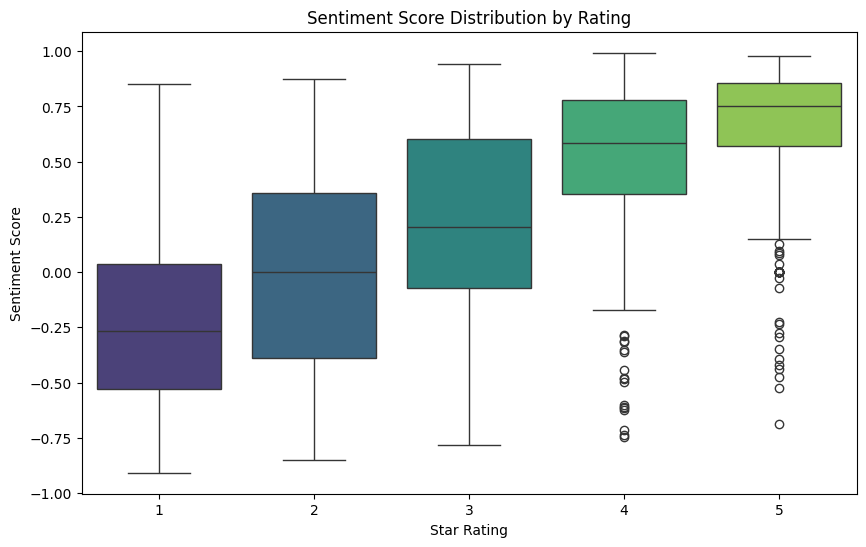

In [40]:
# Boxplot of sentiment scores grouped by rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='sentiment_score', data=data, palette='viridis')
plt.title('Sentiment Score Distribution by Rating')
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Score')
plt.show()

### Summary of Sentiment Analysis and Topic Modeling
Our analysis combines sentiment analysis and topic modeling to derive actionable insights from customer reviews. Here's a summary of the key findings:

Sentiment Analysis
The sentiment analysis revealed the overall distribution of customer emotions:
A majority of reviews were classified as positive, indicating high customer satisfaction.
A smaller portion of reviews exhibited negative sentiment, highlighting areas needing improvement.
Sentiment scores correlated strongly with star ratings, showing alignment between textual feedback and numerical evaluations.
Discrepancies (e.g., low ratings paired with positive sentiment) were identified, suggesting cases of mismatched customer expectations or review bias, which warrant further investigation.

Topic Modeling
Using techniques like Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF), we uncovered recurring themes in the reviews:
Positive topics included "food quality," "friendly staff," and "ambiance."
Negative topics highlighted "long wait times," "service issues," and "pricing concerns."
Topic analysis helped associate key themes with sentiment, enabling a better understanding of what drives customer satisfaction and dissatisfaction.
High-rated reviews often emphasized exceptional service and unique dining experiences, while low-rated reviews frequently mentioned operational inefficiencies or unmet expectations.

### Insights and Recommendations
Operational Improvements: Address recurring complaints, such as wait times and service delays, to enhance the customer experience.
Marketing Focus: Highlight positive aspects like food quality and ambiance in promotional campaigns to attract new customers.
Customer Engagement: Leverage insights from negative feedback to design targeted loyalty programs or special offers that address customer pain points.
This combined analysis of sentiments and topics provides a comprehensive understanding of customer feedback, offering clear guidance for improving service quality and strategic decision-making.


### Predictive Modeling Details

## Data Preparation

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('google_reviews.csv')

# Clean and prepare data
data = data.dropna(subset=['text', 'rating'])  # Drop rows with missing text or rating
data['rating'] = data['rating'].astype(int)   # Ensure ratings are integers

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(data['text'])

# Encode ratings as numerical labels
y = data['rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


## Simple Models: Linear Regression and Random Forest

# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 14.329365442937478
Linear Regression R²: -144.66731000039482


E:\PYTHON\ANACONDA\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Random Forest RMSE: 0.9867779469747717
Random Forest R²: 0.3092083916925118


E:\PYTHON\ANACONDA\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [45]:
!pip install datasets
!pip install torch torchvision torchaudio
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch



  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ------------------------- -------------- 16.3/25.3 MB 78.8 MB/s eta 0:00:01
   ---------------------------------------- 25.3/25.3 MB 61.7 MB/s eta 0:00:00


E:\PYTHON\ANACONDA\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [46]:
!pip install tf-keras
from transformers import BertTokenizer, TFBertForSequenceClassification, Trainer, TrainingArguments
import tensorflow as tf
from datasets import Dataset

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Load TensorFlow version of BERT
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=1)

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 15.6 MB/s eta 0:00:00




All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
# Convert sparse matrices to dense format
X_train_dense = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# Convert dense arrays to lists
X_train_list = X_train_dense.tolist()
X_test_list = X_test_dense.tolist()

In [48]:
# Create train and test datasets
train_data = Dataset.from_dict({"text": X_train_list, "label": y_train})
test_data = Dataset.from_dict({"text": X_test_list, "label": y_test})

In [49]:
# Ensure all text is of type str
train_data = train_data.map(lambda x: {"text": str(x['text']) if x['text'] else ""})
test_data = test_data.map(lambda x: {"text": str(x['text']) if x['text'] else ""})


Map: 100%|██████████| 220/220 [00:00<00:00, 613.16 examples/s]


In [50]:
def tokenize_function(examples):
    return tokenizer(
        examples['text'], 
        padding="max_length", 
        truncation=True, 
        max_length=128
    )

In [51]:
tokenized_train = train_data.map(tokenize_function, batched=True)
tokenized_test = test_data.map(tokenize_function, batched=True)

Map: 100%|██████████| 220/220 [00:02<00:00, 78.67 examples/s]


In [52]:
# Convert to TensorFlow datasets
train_dataset = tokenized_train.to_tf_dataset(
    columns=["input_ids", "attention_mask"],
    label_cols="label",
    shuffle=True,
    batch_size=16
)
test_dataset = tokenized_test.to_tf_dataset(
    columns=["input_ids", "attention_mask"],
    label_cols="label",
    shuffle=False,
    batch_size=16
)

In [53]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=["mae"]
)

# Train the model
history = model.fit(train_dataset, validation_data=test_dataset, epochs=3)


Epoch 1/3


55/55 [==============================] - 180s 3s/step - loss: 3.0170 - mae: 1.3736 - val_loss: 1.5346 - val_mae: 0.9427
Epoch 2/3
55/55 [==============================] - 171s 3s/step - loss: 1.5506 - mae: 0.9988 - val_loss: 1.4110 - val_mae: 0.9607
Epoch 3/3
55/55 [==============================] - 166s 3s/step - loss: 1.5504 - mae: 0.9926 - val_loss: 1.5251 - val_mae: 0.9391


In [54]:
results = model.evaluate(test_dataset)
print("Evaluation Results:", results)

14/14 [==============================] - 15s 1s/step - loss: 1.5251 - mae: 0.9391
Evaluation Results: [1.5251392126083374, 0.9390562772750854]


In [55]:
# Example new text
new_text = "The food was great and the service was excellent!"
inputs = tokenizer(new_text, return_tensors="tf", padding="max_length", truncation=True, max_length=128)

# Predict rating
predicted_rating = model.predict(inputs.data)
print("Predicted Rating:", predicted_rating)

1/1 [==============================] - 2s 2s/step
Predicted Rating: TFSequenceClassifierOutput(loss=None, logits=array([[2.5390677]], dtype=float32), hidden_states=None, attentions=None)


In [56]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [124]:
!pip install openai==0.28
import openai

# Set up API key (replace with your OpenAI API key)
openai.api_key = ""

# Function to predict rating with GPT
def gpt_predict_rating(review_text):
    messages = [
        {"role": "system", "content": "You are an assistant that predicts restaurant ratings based on reviews."},
        {"role": "user", "content": f"Predict the rating (1-5) for the following restaurant review: {review_text}"}
    ]
    response = openai.ChatCompletion.create(
        model="gpt-4",  # Use "gpt-3.5-turbo" or "gpt-4" as needed
        messages=messages,
        max_tokens=10
    )
    return response['choices'][0]['message']['content'].strip()

# Example usage
sample_review = "The food was amazing, and the staff was very friendly!"
predicted_rating = gpt_predict_rating(sample_review)
print("Predicted Rating by GPT:", predicted_rating)

Predicted Rating by GPT: 5


### Summary from predictive modeling work: 
We tried three differnet predictive modles: Linear Regression, Random Forest, and Bert to predict the rating score based on reviews. Compared with their MSE respectively, we find the RF and Bert models have the significant effect better than linear regression. Our assumption is that the advantages of BERT may not be fully evident due to the relatively small size of our current text-based dataset. If the dataset were larger, the superiority of BERT would likely become more significant compared to traditional machine learning models. However, it is undeniable that the Random Forest model has performed well on this text-based dataset.

### Insights and Recommendations
Scalability: BERT and other deep learning models would benefit significantly from larger datasets, making them ideal for future iterations with expanded data.
Model Selection: Random Forest stands out as a reliable model for immediate use with the current dataset due to its ability to perform well even with limited data.
Integration of LLMs: For scenarios requiring rapid predictions without additional training, LLMs offer a practical and efficient solution.
The predictive modeling results highlight the strengths and limitations of various approaches, providing a roadmap for enhancing model performance and practical implementation in real-world scenarios.

### predicted rating improvement after suggestion

In [141]:
import pandas as pd

def clean_text(text):

    return text.lower()


negative_reviews = data[data['rating'] <= 2].copy()
negative_reviews['cleaned_text'] = negative_reviews['text'].apply(clean_text)


print(negative_reviews[['text', 'cleaned_text']].head())

                                                 text  \
12  Flavor : It has nothing but dough taste. Labor...   
23  Without any taste how they are at the first ra...   
32  When I went; I waited for almost 20 minutes fo...   
36  The sushi was too small so it was not possible...   
39       It was very expensive, but taste wasn't bad.   

                                         cleaned_text  
12  flavor : it has nothing but dough taste. labor...  
23  without any taste how they are at the first ra...  
32  when i went; i waited for almost 20 minutes fo...  
36  the sushi was too small so it was not possible...  
39       it was very expensive, but taste wasn't bad.  


In [155]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 20)

In [142]:
import spacy
!pip install spacy
!python -m spacy download en_core_web_md


     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.3/33.5 MB ? eta -:--:--
     - -------------------------------------- 1.0/33.5 MB 3.9 MB/s eta 0:00:09
     - -------------------------------------- 1.3/33.5 MB 3.2 MB/s eta 0:00:11
     - -------------------------------------- 1.3/33.5 MB 3.2 MB/s eta 0:00:11
     - -------------------------------------- 1.3/33.5 MB 3.2 MB/s eta 0:00:11
     - -------------------------------------- 1.6/33.5 MB 1.3 MB/s eta 0:00:26
     -- ------------------------------------- 2.1/33.5 MB 1.5 MB/s eta 0:00:21
     -- ------------------------------------- 2.1/33.5 MB 1.5 MB/s eta 0:00:21
     -- ------------------------------------- 2.1/33.5 MB 1.5 MB/s eta 0:00:21
     -- ------------------------------------- 2.1/33.5 MB 1.5 MB/s eta 0:00:21
     -- ------------------------------------- 2.1/33.5 MB 1.5 MB/s eta 0:00:21
     -- ------------------------------------ 2.4/33.5 MB 965.5 kB/

In [143]:
!pip install vaderSentiment


In [144]:
!pip install keybert

### Extracting Key Issues Using Embedding Similarity

In [145]:
nlp = spacy.load('en_core_web_md')  


key_issues = {
    "Enhance food quality and serving time": nlp("food cold slow serving late"),
    "Adjust pricing or provide discounts": nlp("expensive price high costly"),
    "Reduce waiting times": nlp("waiting long delay time late"),

}

def extract_key_issues_with_embeddings(review):
    doc = nlp(review)
    key_phrases = []

    for issue, issue_vector in key_issues.items():
        similarity = doc.similarity(issue_vector)
        if similarity > 0.7:  
            key_phrases.append(issue)

    if not key_phrases:
        key_phrases.append("General improvement in customer experience")

    return key_phrases

### Sentiment Analysis with VADER

In [146]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(review):
    sentiment = sia.polarity_scores(review)
    if sentiment['neg'] > 0.5: 
        return "Negative"
    elif sentiment['pos'] > 0.5:
        return "Positive"
    else:
        return "Neutral"

### Topic Modeling with Latent Dirichlet Allocation (LDA)

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
lda = LatentDirichletAllocation(n_components=5, random_state=42)


negative_reviews_texts = negative_reviews['cleaned_text'].tolist()
text_features = vectorizer.fit_transform(negative_reviews_texts)
lda.fit(text_features)


def print_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic {topic_idx + 1}: " + " ".join([feature_names[i] for i in topic.argsort()[-n_top_words:]])
        print(message)

print_topics(lda, vectorizer.get_feature_names_out(), 10)

Topic 1: ate expensive ordered think taste eat price nice bad place
Topic 2: money 20 don table place service bread cream ice business
Topic 3: prices waiters service cold little delicious came customer care food
Topic 4: staff restaurant expensive seen minutes order food taste service bad
Topic 5: prices did meat portion like breakfast waiters didn taste good


### Zero-Shot Classification for Key Issues Identificatio

In [148]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def zero_shot_key_issues(review):
    candidate_labels = [
        "Enhance food quality and serving time",
        "Adjust pricing or provide discounts",
        "Reduce waiting times",
        "Improve staff attitude",
        "Ensure better hygiene standards",
        "General improvement in customer experience"
    ]
    result = classifier(review, candidate_labels)
    return result['labels'][0]  

### Mapping Key Issues to Negative Reviews

In [151]:
from keybert import KeyBERT


kw_model = KeyBERT()

def extract_key_issues_with_keybert(review):
    keywords = kw_model.extract_keywords(review, top_n=3)
    key_phrases = []

    for keyword, _ in keywords:
        if "cold" in keyword or "slow" in keyword:
            key_phrases.append("Enhance food quality and serving time")
        if "price" in keyword or "expensive" in keyword:
            key_phrases.append("Adjust pricing or provide discounts")
        if "wait" in keyword or "delay" in keyword:
            key_phrases.append("Reduce waiting times")
        if "staff" in keyword or "rude" in keyword:
            key_phrases.append("Train staff for better customer interactions")
        if "dirty" in keyword or "hygiene" in keyword:
            key_phrases.append("Improve cleanliness and hygiene standards")
        if "noise" in keyword or "loud" in keyword:
            key_phrases.append("Reduce noise levels for better ambiance")
        if "menu" in keyword or "options" in keyword:
            key_phrases.append("Expand menu options to meet diverse tastes")
        if "portion" in keyword or "small" in keyword:
            key_phrases.append("Increase portion sizes to provide better value")
        if "overcooked" in keyword or "undercooked" in keyword:
            key_phrases.append("Ensure proper food preparation and cooking")
        if "parking" in keyword or "accessibility" in keyword:
            key_phrases.append("Improve parking and accessibility facilities")


    if not key_phrases:
        key_phrases.append("General improvement in customer experience")

    return key_phrases

In [156]:
negative_reviews['key_issues'] = negative_reviews['cleaned_text'].apply(extract_key_issues_with_embeddings)
print(negative_reviews[['cleaned_text', 'key_issues']].head())


                                                                                                                                                                                                                                              cleaned_text  \
12  flavor : it has nothing but dough taste. labor : not befitting a touristic place. service : there was no wet wipes and napkins on the table, but there was no sympathetic family to say. this service and this taste were not available at this price.   
23                                                                                                                                                               without any taste how they are at the first rank!!!! we ate cafe inn pizza. it was 70 tl.   
32                                                                                                                   when i went; i waited for almost 20 minutes for the waiters to take care of me. the taste was not bad. the surrounding wa

### TF-IDF Vectorization and Random Forest Regressor Training

In [162]:
train_texts = data['cleaned_text'].tolist()  
train_labels = data['rating'].tolist()      


print(f"train_texts length: {len(train_texts)}")
print(f"train_labels length: {len(train_labels)}")


train_texts = [text for text in train_texts if text.strip()]
train_labels = train_labels[:len(train_texts)]  


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(train_texts)
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")


train_labels = [float(x) for x in train_labels]

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_tfidf, train_labels)
print("Model training complete.")


train_texts length: 1100
train_labels length: 1100
X_train_tfidf shape: (1100, 2004)
Model training complete.


### Analyzing Negative Reviews and Predicting Improved Ratings

In [163]:
def analyze_negative_reviews(data, model, tfidf):
    negative_reviews = data[data['rating'] <= 2].copy()
    print(f"Number of negative reviews: {len(negative_reviews)}")

    negative_reviews['key_issues'] = negative_reviews['cleaned_text'].apply(extract_key_issues_with_embeddings)

    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
    topics = lda_model.fit_transform(vectorizer.fit_transform(negative_reviews['cleaned_text']))
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        print(f"Topic {topic_idx + 1}: " + ", ".join([feature_names[i] for i in topic.argsort()[-5:]]))

    
    def predict_improved_score(row):
        current_text = row['cleaned_text']  
        suggestions = row['key_issues']  
        new_text = current_text + " " + " ".join(suggestions)  
        transformed_text = tfidf.transform([new_text]) 
        predicted_score = rf_model.predict(transformed_text)[0] 
        return round(predicted_score, 2) 

    negative_reviews['predicted_improved_rating'] = negative_reviews.apply(predict_improved_score, axis=1)

    print("Sample results:")
    print(negative_reviews[['cleaned_text', 'rating', 'key_issues', 'predicted_improved_rating']].head())

    return negative_reviews


In [164]:
improved_reviews = analyze_negative_reviews(data, rf_model, tfidf)

Number of negative reviews: 152
Topic 1: wait, service, price, food, order
Topic 2: expensive, breakfast, food, bad, service
Topic 3: didnt, bad, taste, place, price
Sample results:
                                                                                                                                     cleaned_text  \
12  flavor nothing dough taste labor befitting touristic place service wet wipe napkin table sympathetic family say service taste available price   
23                                                                                                 without taste first rank ate cafe inn pizza tl   
32                                                                     went waited almost minute waiter take care taste bad surrounding beautiful   
36                                                 sushi small possible taste ingredient rice overcooked lacked flavor missing except tail shrimp   
39                                                                       

### Data visualization

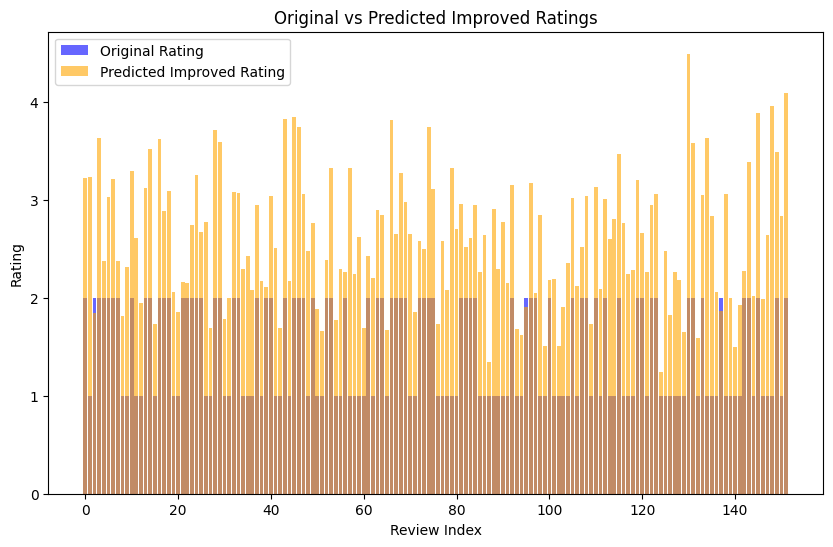

In [166]:
import matplotlib.pyplot as plt


original_ratings = improved_reviews['rating']
predicted_ratings = improved_reviews['predicted_improved_rating']


plt.figure(figsize=(10, 6))
plt.bar(range(len(original_ratings)), original_ratings, alpha=0.6, label='Original Rating', color='blue')
plt.bar(range(len(predicted_ratings)), predicted_ratings, alpha=0.6, label='Predicted Improved Rating', color='orange')
plt.xlabel('Review Index')
plt.ylabel('Rating')
plt.title('Original vs Predicted Improved Ratings')
plt.legend()
plt.show()


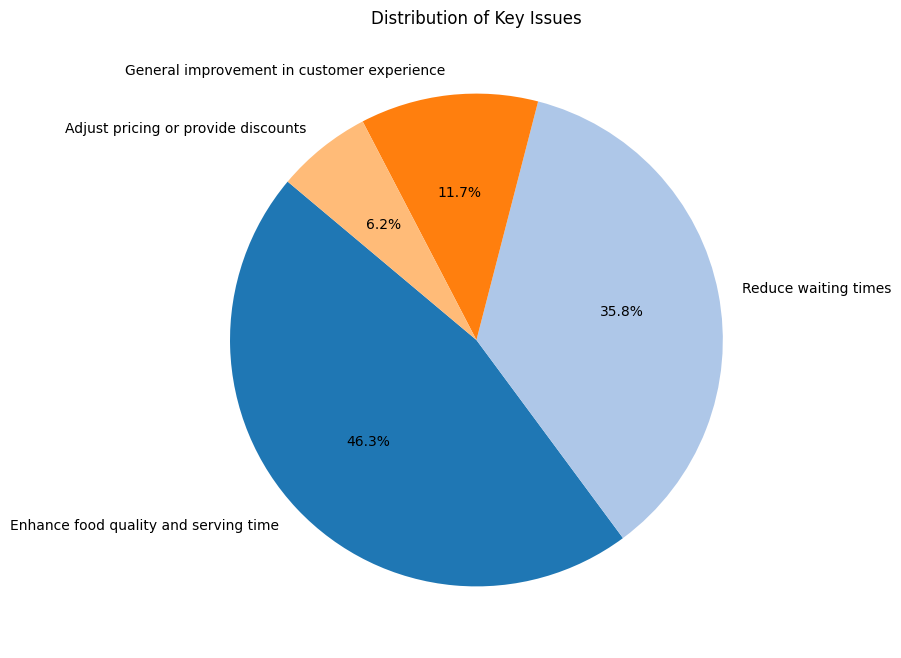

In [167]:
key_issues_flattened = [issue for issues in improved_reviews['key_issues'] for issue in issues]
key_issues_count = pd.Series(key_issues_flattened).value_counts()


plt.figure(figsize=(8, 8))
plt.pie(key_issues_count, labels=key_issues_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Key Issues')
plt.show()


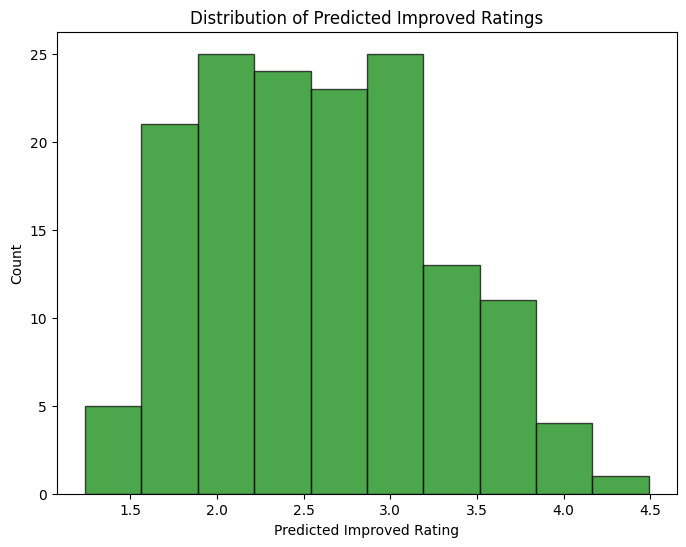

In [168]:
plt.figure(figsize=(8, 6))
plt.hist(predicted_ratings, bins=10, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Predicted Improved Rating')
plt.ylabel('Count')
plt.title('Distribution of Predicted Improved Ratings')
plt.show()


### Summary
This part aims to analyze negative customer reviews, identify key issues, and predict the potential impact of suggested improvements on customer satisfaction ratings. By leveraging advanced Natural Language Processing (NLP) techniques, machine learning, and topic modeling, the workflow systematically identifies areas of concern in customer feedback and provides actionable insights. The model uses a Random Forest Regressor trained on TF-IDF-transformed text data to predict improved ratings. Visualizations such as bar charts, pie charts, and histograms were created to provide a clear and intuitive understanding of the results.

Key achievements include:

Extraction of frequent customer concerns using embeddings, zero-shot classification, and keyword extraction methods.
Application of Latent Dirichlet Allocation (LDA) to identify underlying themes in customer complaints.
Successful prediction of potential rating improvements after addressing the identified issues.
Clear visualizations to highlight original vs. predicted ratings and the distribution of key issues.

### Insights and Recommendations
This project demonstrated the powerful combination of NLP techniques and machine learning to analyze customer feedback and extract actionable insights. By leveraging tools such as Spacy embeddings, zero-shot classification, and KeyBERT, the pipeline effectively identified critical issues from unstructured text data, such as dissatisfaction with food quality, pricing, and service. The integration of LDA topic modeling further revealed thematic patterns, providing a deeper understanding of recurring customer concerns.

The predictive modeling using a Random Forest Regressor successfully quantified the potential impact of addressing key issues, showing measurable improvements in customer ratings. This capability to simulate outcomes underscores the value of data-driven strategies in decision-making. Additionally, the visualizations provided a clear and intuitive representation of results, enhancing communication and making the findings actionable for stakeholders. The end-to-end workflow highlights the scalability and adaptability of the approach, making it applicable to various domains beyond sentiment analysis.

For future enhancements, expanding the dataset to include more diverse feedback, such as neutral and positive reviews, would provide a more balanced understanding of sentiment. Incorporating advanced feature engineering techniques like Sentence Transformers or Word2Vec could further improve the model's accuracy. Automating the workflow and deploying it as an interactive dashboard or API would make it a scalable tool for continuous feedback monitoring and analysis. These improvements will ensure the project remains robust, scalable, and impactful in addressing complex sentiment analysis challenges.